# Python EDA - Creating Visuals for Presentation and Using Linear Regression 

## This is an analysis performed on Super Store Sales Data

### QUESTIONS WE WILL ANSWER 

#### ***All questions address the four-year sum total***

##### 1) Which category had the highest sales?
##### 2) Which subcategory had the highest sales within each category?
##### 3) What cities had the highest sales (Top 10)?
##### 4) What was the best month for sales?
##### 5) Which region had the highest sales?
##### 6) What was the average number of items per order?
##### 7) What was the average amount of money spent per order?
##### 8) In which region were the most items sold?
##### 9) Which shipping mode was most popular?
##### 10) Over the four year period, what was the overall sales trend?
##### 11) Is the Linear Model a good fit for predicting 2019 sales?


#### Importing and reading-in

In [1]:
# IMPORTING BASIC LIBRARIES 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import gc
from itertools import combinations
from collections import Counter
from scipy import stats

In [2]:
# READING IN super_store.csv

ss = pd.read_csv('super_store.csv')

# DATA AUDIT

In [3]:
# SHOW FIRST FIVE ROWS OF DF

ss.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/17,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/16,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/16,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# SHOW LAST FIVE ROWS OF DF

ss.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/1/16,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/1/16,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/1/16,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/1/16,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [5]:
# SHOW SHAPE OF DF

ss.shape

(9800, 18)

In [6]:
# SHOW COLUMN NAMES OF DF

ss.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [7]:
# SHOW DF INFO

ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
# CHECKING FOR MISSING VALUES 

ss.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

# DATA CLEANSING

#### TASK 1 - Dealing with NaN values

In [9]:
# FIND and LOOK AT ROWS with NaN

nan_ss = ss[ss.isna().any(axis=1)]
nan_ss.head(11)

# FILTERING FOR Burlington to see if any current zip exists in the DF

burl_ss = ss[ss.City == 'Burlington']
burl_ss

# There are multiple states with cities named Burlington. Burlington Vermont has NaN for zipCode in all cases 

# A google search shows 05401 is a relaible zip-code option for Burlington since we have no actual facility to locate

# Replacing 11 NaN values in the Postal Code column with 05401

ss = ss.replace(np.nan, '05401')

# Checking Results

print(ss[(ss.City == 'Burlington') & (ss.State == 'Vermont')])

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
2234    2235  CA-2018-104066     5/12/18    10/12/18  Standard Class   
5274    5275  CA-2016-162887     7/11/16     9/11/16    Second Class   
8798    8799  US-2017-150140      6/4/17     10/4/17  Standard Class   
9146    9147  US-2017-165505  23/01/2017  27/01/2017  Standard Class   
9147    9148  US-2017-165505  23/01/2017  27/01/2017  Standard Class   
9148    9149  US-2017-165505  23/01/2017  27/01/2017  Standard Class   
9386    9387  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9387    9388  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9388    9389  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9389    9390  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9741    9742  CA-2016-117086     8/11/16    12/11/16  Standard Class   

     Customer ID     Customer Name      Segment        Country        City  \
2234    QJ-19255      Quincy Jones    Corporate  United S

#### TASK 2 - Dealing with Data-Types

In [10]:
# Converting Postal Code column to_numeric

ss['Postal Code'] = pd.to_numeric(ss['Postal Code'])

#Converting Order Date & Ship Date columns to_datetime

ss['Ship Date'] = pd.to_datetime(ss['Ship Date'])

ss['Order Date'] = pd.to_datetime(ss['Order Date'])

#### TASK 3 - Dealing with the Postal Code column

In [11]:
#Converting Postal Code column to .str 

ss['Postal Code'] = ss['Postal Code'].astype('string')

In [12]:
# Removing the . in Postal Code column 

ss['Postal Code'] = ss['Postal Code'].str.replace('.', '')

# Removing the last Char in the Postal Code Column if the length is 6 

ss['Postal Code'] = ss.apply(
    lambda row: row['Postal Code'][:-1] if len(row['Postal Code']) == 6 else row['Postal Code'],
    axis=1
)

#### TASK 4 - Create Month/ Year / Day columns 

In [13]:
# Creating Month / Year / Day columns

ss['Order Month'] = ss['Order Date'].dt.month
ss['Order Year'] = ss['Order Date'].dt.year
ss['Order Day'] = ss['Order Date'].dt.day

#### TASK 5 - Round Sales to the 100th decimal place 

In [14]:
ss['Sales'] = ss['Sales'].apply(lambda row: round(row,2) )

In [15]:
# Show snippet of current df

ss.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Month,Order Year,Order Day
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,8,2017,11
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,8,2017,11
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,12,2017,6


### PRINT DESCRIPTIVE STATS

In [16]:
describing_df = round(ss.describe(),2)
describing_df

,Row ID,Sales,Order Month,Order Year,Order Day
count,9800.00,9800.00,9800.00,9800.00,9800.00
mean,4900.50,230.77,7.19,2016.72,16.12
std,2829.16,626.65,3.42,1.12,8.07
min,1.00,0.44,1.00,2015.00,1.00
25%,2450.75,17.25,4.00,2016.00,10.00
50%,4900.50,54.49,8.00,2017.00,16.00
75%,7350.25,210.60,10.00,2018.00,23.00
max,9800.00,22638.48,12.00,2018.00,31.00


# EXPLORITORY DATA ANALYSIS (EDA)

## SALES

#### 1) Which category had the highest sales?

#### ANSWER: Technology

In [17]:
#GroupBy the category and sales columns 

cat_sub_profit = pd.DataFrame(ss.groupby(['Category']).sum()['Sales'])
cat_by_sales = cat_sub_profit.sort_values(['Sales'], ascending=False).reset_index()

cat_by_sales

,Category,Sales
0,Technology,827455.90
1,Furniture,728658.50
2,Office Supplies,705422.14


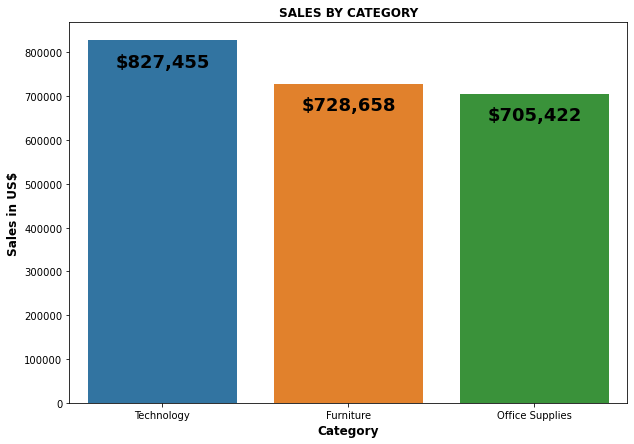

In [18]:
#Plotting This Info in Bar-Chart

plt.figure(figsize=(10,7))
cat_plot = sns.barplot(x='Category', y = 'Sales', data=cat_by_sales)
plt.title('SALES BY CATEGORY', fontweight='bold')
plt.ylabel('Sales in US$',fontsize='12' , fontweight='bold')
plt.xlabel('Category',fontsize='12'  , fontweight='bold')
plt.text(2,645000, "$705,422", ha ='center', fontweight='bold', fontsize='18')
plt.text(1,668000, "$728,658", ha ='center', fontweight='bold', fontsize='18')
plt.text(0,767000, "$827,455", ha ='center', fontweight='bold', fontsize='18')
plt.savefig('cap2_sales_CAT.png', transparent=True) #SO DOES NOT SAVE ACCIDENTALLY 
plt.show()

#### 2) Which sub-category had the highest sales within each category?

#### ANSWER: Technology: Phones / Furniture: Chairs / Office Supplies: Storage 

In [19]:
cat_sub_sales = pd.DataFrame(ss.groupby(['Category', 'Sub-Category']).sum()['Sales']).reset_index()
cat_sub_sales_arranged = pd.merge(cat_by_sales['Category'],cat_sub_sales.sort_values('Sales',ascending=False), on='Category')
cat_sub_sales_arranged

,Category,Sub-Category,Sales
0,Technology,Phones,327782.49
1,Technology,Machines,189238.64
2,Technology,Accessories,164186.70
3,Technology,Copiers,146248.07
4,Furniture,Chairs,322822.70
5,Furniture,Tables,202810.64
6,Furniture,Bookcases,113813.18
7,Furniture,Furnishings,89211.98
8,Office Supplies,Storage,219343.37
9,Office Supplies,Binders,200028.69


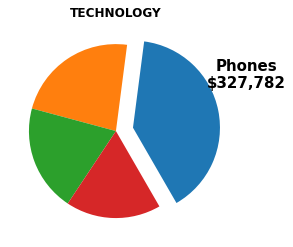

In [20]:
# Create value-groups for pie charts
tech = np.array(cat_sub_sales_arranged[:4]['Sales'])
furniture = np.array(cat_sub_sales_arranged[4:8]['Sales'])
office = np.array(cat_sub_sales_arranged[8:17]['Sales'])

#Create labels for pie charts
tech_subs = np.array(cat_sub_sales_arranged[:4]['Sub-Category'])
furniture_subs = np.array(cat_sub_sales_arranged[4:8]['Sub-Category'])
office_subs = np.array(cat_sub_sales_arranged[8:17]['Sub-Category'])

#Create values for explosion
explode1 = [0.2, 0, 0, 0]
explode2 = [0.2, 0, 0, 0]
explode3 = [0.2, 0, 0, 0, 0, 0, 0, 0, 0]

#Plotting Tech


plt.pie(tech, explode = explode1, startangle = 300)
plt.title('TECHNOLOGY', fontweight = 'bold')
plt.text(1.5,.5, "Phones\n$327,782", ha ='center', fontweight='bold', fontsize='15')
plt.savefig('cap2_tech_pie.png',transparent=True, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

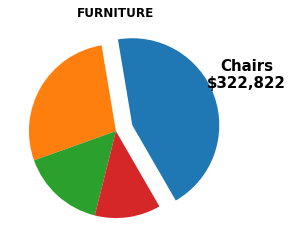

In [21]:
#Plotting Furniture
plt.pie(furniture, explode = explode2,startangle = 300)
plt.title('FURNITURE', fontweight = 'bold')
plt.text(1.5,.5, "Chairs\n$322,822", ha ='center', fontweight='bold', fontsize='15')
plt.savefig('cap2_furniture_pie.png',transparent=True, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

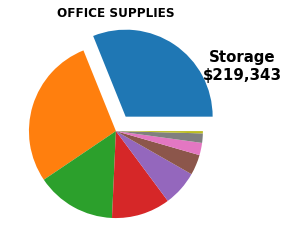

In [22]:
#Plotting Office Supplies


plt.pie(office, explode = explode3, )
plt.title('OFFICE SUPPLIES', fontweight = 'bold')
plt.text(1.45,.6, "Storage\n$219,343", ha ='center', fontweight='bold', fontsize='15')
plt.savefig('cap2_office_pie.png',transparent=True, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()


#### 3) Which cities had the highest sales (Top 10)?

#### ANSWER: (1-10) New York, Los Angeles, Seattle, San Fransisco, Philadelphia, Houston, Chicago, San Diego, Jacksonville, Detroit 

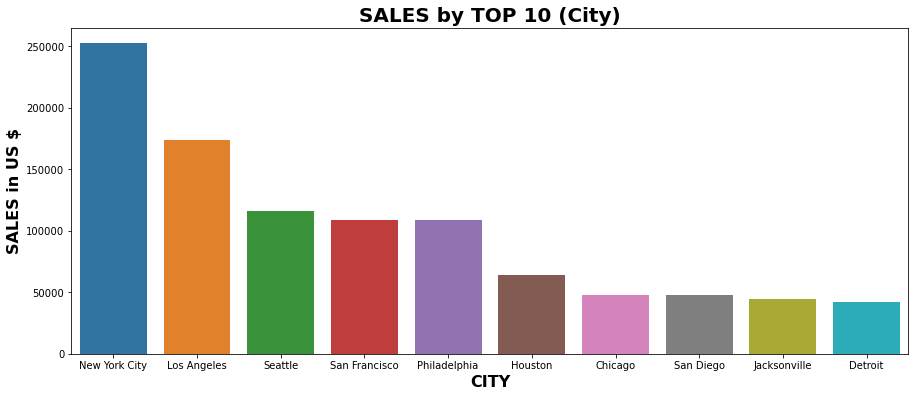

In [23]:
#Create df for Top-10 cities and plot

sales_city = pd.DataFrame(ss.groupby('City').sum()['Sales'])
sales_city.sort_values(by=['Sales'], inplace = True, ascending = False)
sales_city.reset_index(inplace = True)
top_ten_city_sales = sales_city.head(10)

plt.figure(figsize=(15,6))
by_city_bar = sns.barplot(x='City', y = 'Sales', data = top_ten_city_sales)
plt.title('SALES by TOP 10 (City)', fontweight='bold', fontsize='20')
plt.ylabel('SALES in US $', fontweight='bold', fontsize = '16')
plt.xlabel('CITY', fontweight='bold', fontsize = '16')
#plt.savefig('cap2_sales_CITY.png',transparent=True, dpi=300)
plt.show()

#### 4) What was the best month for sales?

#### ANSWER: November

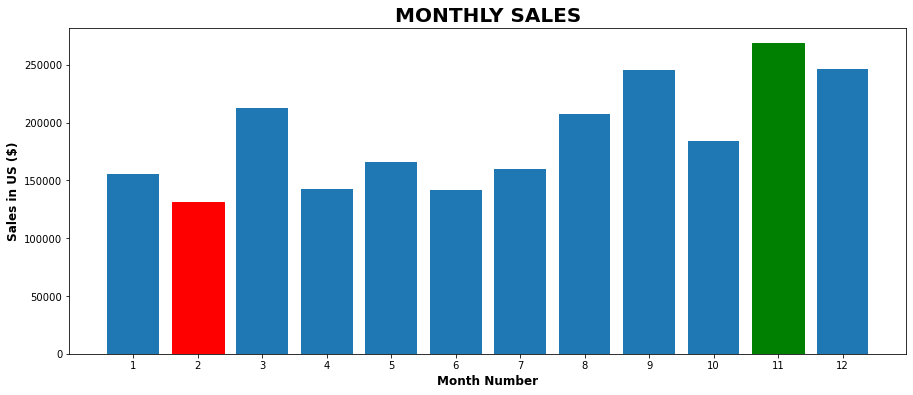

In [24]:
by_month = pd.DataFrame(ss.groupby('Order Month').sum())
by_month.sort_values('Sales')


# Show in Bar Graph 

months = range(1,13)
plt.figure(figsize=(15,6))
month_sales_bar = plt.bar(months, by_month['Sales'])
plt.xticks(months)
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel("Sales in US ($)", fontweight = 'bold', fontsize='12')
plt.xlabel("Month Number", fontweight = 'bold', fontsize='12')
plt.title('MONTHLY SALES', fontweight='bold', fontsize='20')
month_sales_bar[months[9]].set_color('g')
month_sales_bar[months[0]].set_color('r')
plt.savefig('cap2_sales_MONTH.png',transparent=True, dpi=300)
plt.show()

#### 5) Which region had the highest sales?

#### ANSWER: West

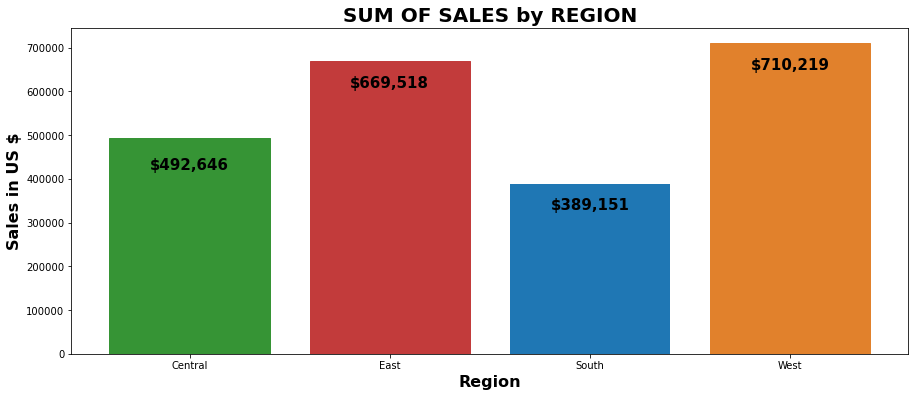

In [25]:
by_reg_sales = pd.DataFrame(ss.groupby('Region').sum()['Sales']).reset_index()

plt.figure(figsize=(15,6))
region_sales_bar = plt.bar(by_reg_sales['Region'], by_reg_sales['Sales'])
plt.title('SUM OF SALES by REGION', fontweight = 'bold', fontsize='20')
plt.ylabel('Sales in US $', fontweight = 'bold', fontsize='16')
plt.xlabel('Region', fontweight = 'bold', fontsize='16')
region_sales_bar[3].set_color('#e1812c')
#region_sales_bar[2].set_color('b')
region_sales_bar[1].set_color('#c23b3b')
region_sales_bar[0].set_color('#369435')
plt.text(3,650000, "$710,219", ha ='center', fontweight='bold', fontsize='15')
plt.text(2,329000, "$389,151", ha ='center', fontweight='bold', fontsize='15')
plt.text(1,609000, "$669,518", ha ='center', fontweight='bold', fontsize='15')
plt.text(0,422000, "$492,646", ha ='center', fontweight='bold', fontsize='15')
plt.savefig('cap2_sales_REGION.png',transparent=True, dpi=300)
plt.show()

## ORDERS 

#### 6) What is the average amount of items sold per order?

#### ANSWER: 2 (1.99 - exact)

In [26]:
#New Df keeping only one itteration of each order ID 
num_items = pd.DataFrame(ss.groupby('Order ID').size())
num_items.columns = ['Items Per Order']
num_items_order = round(num_items.describe(), 2)
num_items_order

,Items Per Order
count,4922.00
mean,1.99
std,1.41
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,14.00


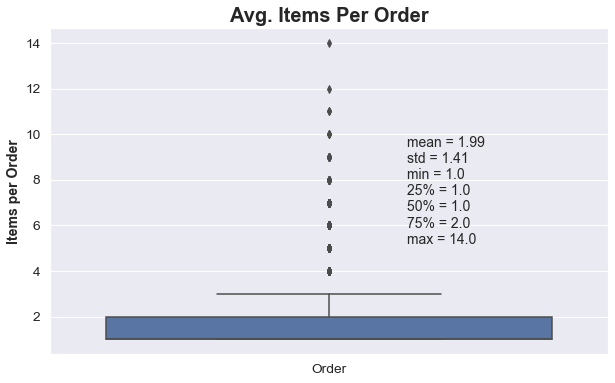

In [48]:
mean_ss = ss.copy()

#Creating DF for BoxPlot 
avg_ss = pd.DataFrame(mean_ss.groupby('Order ID').size())
avg_ss.columns=['Items Per Order']
gg_ss = avg_ss.assign(Order = 'Order')

#Plotting
plt.figure(figsize=(10,6))
avg_box = sns.boxplot(x="Order",y="Items Per Order", data = gg_ss)
plt.ylabel('Items per Order', fontweight='bold', fontsize='14')
plt.title('Avg. Items Per Order', fontweight='bold', fontsize='20')
plt.text(.14,5.2, "mean = 1.99\nstd = 1.41\nmin = 1.0\n25% = 1.0\n50% = 1.0\n75% = 2.0\nmax = 14.0", ha ='left', fontweight='light', fontsize='14')
plt.savefig('cap2_boxplot_ITEMS.png', dpi=300)
plt.xlabel('',fontweight='bold', fontsize='12')
plt.show()

#### 7) What is the average amount of money spent per order?

#### ANSWER: $459.48

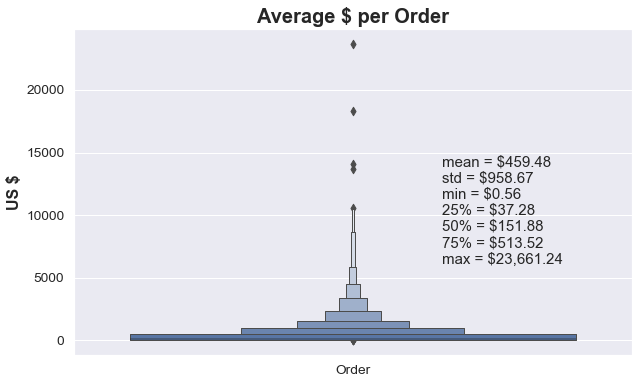

,$ Spent Per Order
count,4922.00
mean,459.48
std,958.67
min,0.56
25%,37.28
50%,151.88
75%,513.52
max,23661.24


In [53]:
#Create DF for boxPlot of $ Spent per Order 
dol_df = ss.copy()
dol_per = pd.DataFrame(dol_df.groupby('Order ID').sum()['Sales'])
dol_per.columns=['Sales Per Order']
boxp_sales = dol_per.assign(Order = 'Order')

#Plotting box plot
plt.figure(figsize=(10,6))

box_plot_sales = sns.boxenplot(x='Order',y='Sales Per Order', data=boxp_sales)
plt.xlabel('')
plt.ylabel('US $', fontweight = 'bold', fontsize='16')
plt.title('Average $ per Order', fontweight='bold', fontsize='20')
plt.text(.16,6150, "mean = $459.48\nstd = $958.67\nmin = $0.56\n25% = $37.28\n50% = $151.88\n75% = $513.52\nmax = $23,661.24", ha ='left', fontweight='light', fontsize='15')
plt.savefig('cap2_boxplot_SALES.png', dpi=300)
plt.show()

#Create Descriptive Stats for $ Spent per order 
dol_amt = pd.DataFrame(ss.groupby('Order ID')['Sales'].sum())
dol_amt.columns = ['$ Spent Per Order']
dol_amt_order = round(dol_amt.describe(),2)
dol_amt_order

#### 8) In which region were the most items sold?

#### ANSWER: West

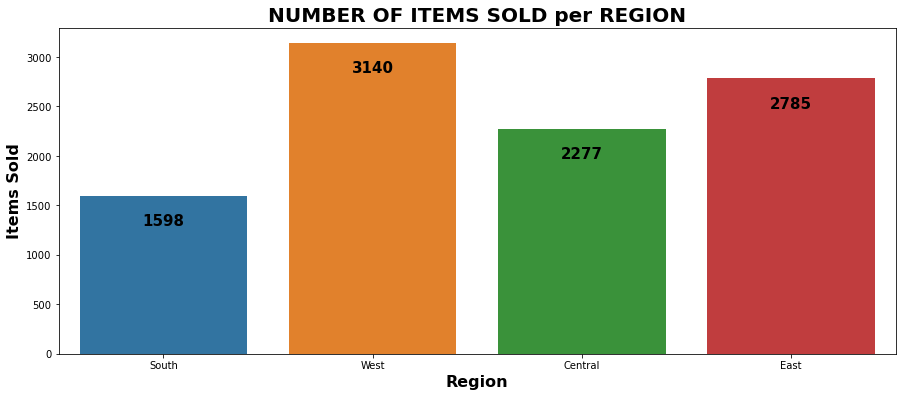

In [29]:
#Breakdown of Regional sales (Count of Sales per Region) 

# Making copy of ss for working here 
ss_copy = ss.copy()

#Created reg_df
region_df = ss_copy.groupby('Region').count()['Sales'].reset_index()
reg_df = region_df.rename(columns={"Count": "Region", "Sales": "Count"})

#Plotting
plt.figure(figsize=(15,6))
num_items_region = sns.countplot(x = ss['Region'])
plt.title('NUMBER OF ITEMS SOLD per REGION', fontweight = 'bold', fontsize='20')
plt.ylabel('Items Sold', fontweight = 'bold', fontsize='16')
plt.xlabel('Region', fontweight = 'bold', fontsize='16')
plt.text(3,2485, "2785", ha ='center', fontweight='bold', fontsize='15')
plt.text(2,1977, "2277", ha ='center', fontweight='bold', fontsize='15')
plt.text(1,2840, "3140", ha ='center', fontweight='bold', fontsize='15')
plt.text(0,1298, "1598", ha ='center', fontweight='bold', fontsize='15')
plt.savefig('cap2_count_REGION.png',transparent=True, dpi=300)
plt.show()

### Making barplot for avg. cost of item sold.
### what is the average cost of product sold in each region?

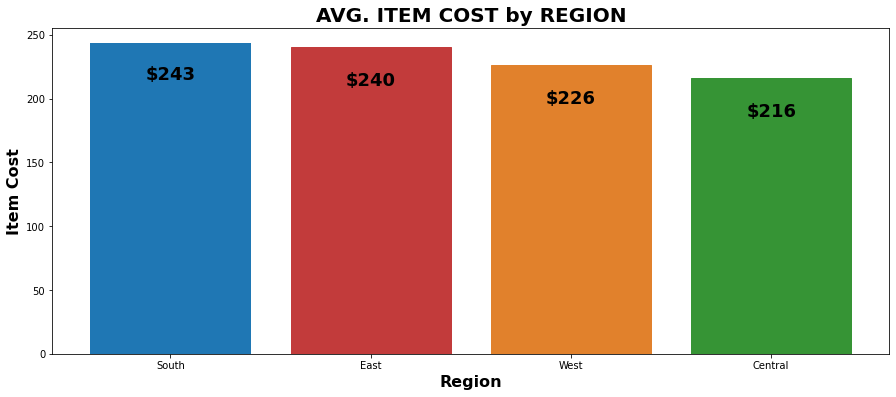

In [30]:
#Create empty DF
avg_cst_region = pd.DataFrame(columns=['Region', 'Average Price of Item Sold', 'Calculation'])

#Fill columns - no need for Calculation column but no need to drop
avg_cst_region['Region'] = by_reg_sales['Region']
avg_cst_region['Calculation'] = 0
avg_cst_region['Average Price of Item Sold'] = round(by_reg_sales['Sales']/reg_df['Count'],2)
ttt = avg_cst_region.sort_values('Average Price of Item Sold', ascending=False)

### Plotting
plt.figure(figsize=(15,6))
av_price_item_region = plt.bar(ttt['Region'], ttt['Average Price of Item Sold'])
plt.text(3,186, "$216", ha ='center', fontweight='bold', fontsize='18')
plt.text(2,196, "$226", ha ='center', fontweight='bold', fontsize='18')
plt.text(1,210, "$240", ha ='center', fontweight='bold', fontsize='18')
plt.text(0,215, "$243", ha ='center', fontweight='bold', fontsize='18')
plt.title('AVG. ITEM COST by REGION',fontweight = 'bold', fontsize='20')
av_price_item_region[3].set_color('#369435')
av_price_item_region[2].set_color('#e1812c')
av_price_item_region[1].set_color('#c23b3b')
#av_price_item_region[0].set_color('')
plt.savefig('cap2_avg_item_REGION.png',transparent=True, dpi=300)
plt.ylabel('Item Cost', fontweight = 'bold', fontsize='16')
plt.xlabel('Region', fontweight = 'bold', fontsize='16')
plt.show()


## SHIPPING 

#### 9) What was the most commonly used ship-mode?

#### ANSWER: Standard Class

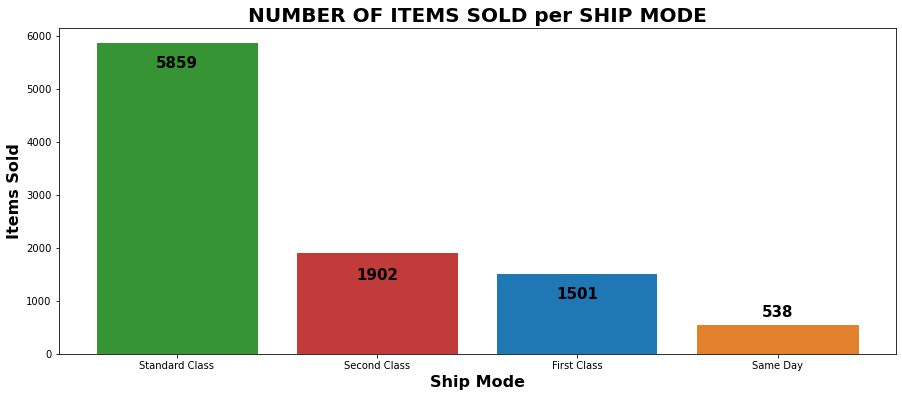

In [31]:
#Breakdown of shipping methods 

# Making copy of ss for working here 
ss_co = ss.copy()

#Created reg_df
shipmo_df = ss_co.groupby('Ship Mode').count()['Sales'].reset_index().rename(columns={"Sales": "Count"})
ship_ship = shipmo_df.sort_values('Count', ascending=False)

#Plotting
plt.figure(figsize=(15,6))
#sns.countplot(x = ss['Ship Mode'])
ship_bar_plot = plt.bar(ship_ship['Ship Mode'], ship_ship['Count'])
plt.title('NUMBER OF ITEMS SOLD per SHIP MODE', fontweight = 'bold', fontsize='20')
plt.ylabel('Items Sold', fontweight = 'bold', fontsize='16')
plt.xlabel('Ship Mode', fontweight = 'bold', fontsize='16')
ship_bar_plot[3].set_color('#e1812c')
#av_price_item_region[2].set_color('b')
ship_bar_plot[1].set_color('#c23b3b')
ship_bar_plot[0].set_color('#369435')
plt.text(3,700, "538", ha ='center', fontweight='bold', fontsize='15')
plt.text(2,1050, "1501", ha ='center', fontweight='bold', fontsize='15')
plt.text(1,1400, "1902", ha ='center', fontweight='bold', fontsize='15')
plt.text(0,5409, "5859", ha ='center', fontweight='bold', fontsize='15')
plt.savefig('cap2_count_SHIPPING.png',transparent=True, dpi=300)
plt.show()


# TRENDS

In [32]:
# CREATING VARIABLES FOR THIS PROCESS


#Segment the main DataFrame by Year for use throughout this section 
year_15 = ss[ss['Order Year'] == 2015]
year_16 = ss[ss['Order Year'] == 2016]
year_17 = ss[ss['Order Year'] == 2017]
year_18 = ss[ss['Order Year'] == 2018]

#Used code below to create a new DF from each year for LIN REG 
sales_v_15 = pd.DataFrame(year_15.groupby('Order Month').sum()['Sales']).reset_index() 
sales_v_16 = pd.DataFrame(year_16.groupby('Order Month').sum()['Sales']).reset_index() 
sales_v_17 = pd.DataFrame(year_17.groupby('Order Month').sum()['Sales']).reset_index() 
sales_v_18 = pd.DataFrame(year_18.groupby('Order Month').sum()['Sales']).reset_index() 


#VARIABLES FOR for-loop
listof_linreg = list((sales_v_15, sales_v_16,sales_v_17,sales_v_18))
yr = 2015

#CREATE list of stats for each year 
for df in listof_linreg:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Order Month'], df['Sales'])
    print(str(yr) + ": STATS\n" + "Slope: " + str(round(slope,2)) + "\nIntercept: " + str(round(intercept,2)) + "\nR-Squared: " +
    str(round(r_value,2)) + "\nP-Value: " + str(round(p_value,2)) + "\nStd_Err: " + str(round(std_err,2)) + "\n")
    yr = yr +1 
    

2015: STATS
Slope: 3313.42
Intercept: 18450.75
R-Squared: 0.68
P-Value: 0.02
Std_Err: 1136.31

2016: STATS
Slope: 2426.56
Intercept: 22513.7
R-Squared: 0.67
P-Value: 0.02
Std_Err: 857.36

2017: STATS
Slope: 1752.0
Intercept: 38628.08
R-Squared: 0.53
P-Value: 0.07
Std_Err: 881.19

2018: STATS
Slope: 1899.06
Intercept: 47827.13
R-Squared: 0.44
P-Value: 0.15
Std_Err: 1218.16



In [33]:
#CREATE LOOP FOR PRESENTATION specs 
yr_1 = 2015

for df in listof_linreg:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Order Month'], df['Sales'])
    print(str(yr_1) + ":\n" + "R-Squared: " + str(round(r_value,2)) + "\nP-Value: " + str(round(p_value,2))+"\n")
    yr_1 = yr_1 +1 

2015:
R-Squared: 0.68
P-Value: 0.02

2016:
R-Squared: 0.67
P-Value: 0.02

2017:
R-Squared: 0.53
P-Value: 0.07

2018:
R-Squared: 0.44
P-Value: 0.15



#### 10) Overall Trend (2015 - 2018)

#### ANSWER: There is a clear upward-trend 

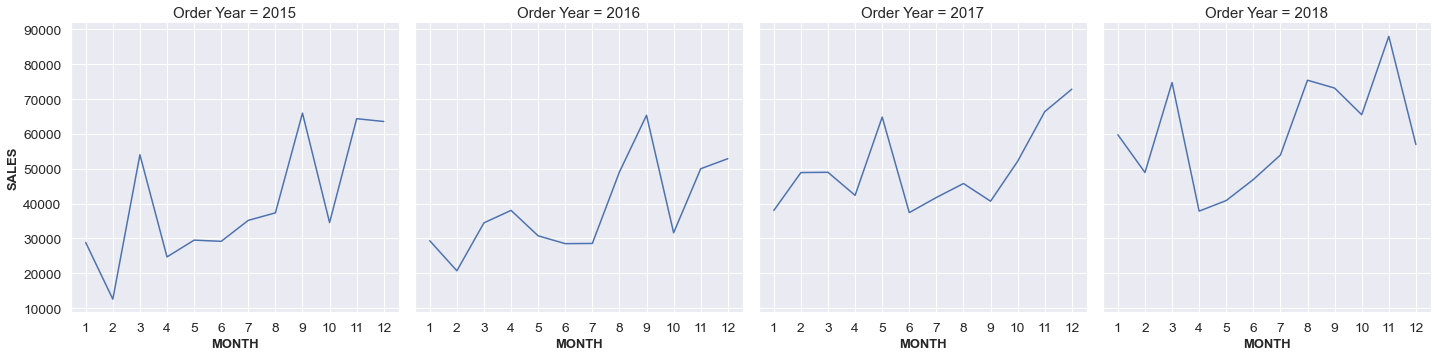

In [34]:
#Plotting 2015 - 2018 sales side-by-side
month_ticks = range(1,13)

by_year_quad = pd.DataFrame(ss.groupby(['Order Year', 'Order Month'])['Sales'].sum())
sns.set(font_scale=1.25)
yearly_sales = sns.relplot(data=by_year_quad, x='Order Month', y='Sales', col='Order Year', kind='line')
plt.xticks(month_ticks)
yearly_sales.set_axis_labels("MONTH", "SALES", fontweight='bold', fontsize='13')
plt.savefig('cap2_all_trend.png')
plt.show()

In [35]:
yearsfrom_x = list(range(12))

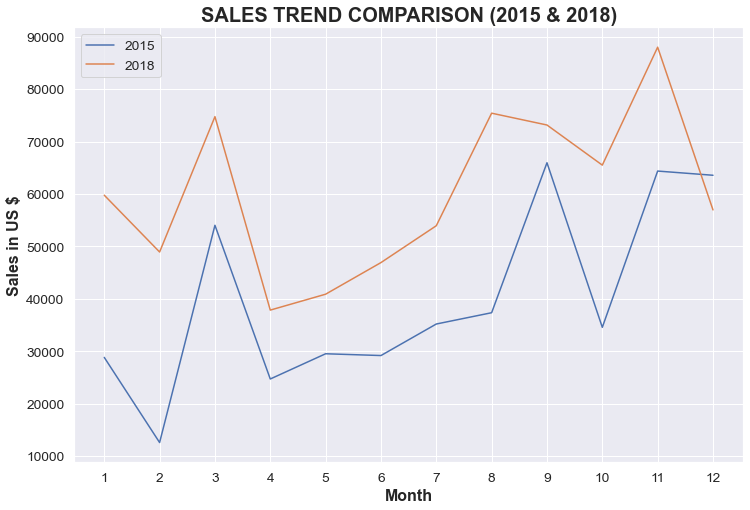

In [36]:
#Creating Data for 2015 / 2018 line comparison 

line_15 = year_15 = ss[ss['Order Year'] == 2015][['Order Month','Sales']].groupby('Order Month').sum()['Sales'].reset_index()
line_18 = year_18 = ss[ss['Order Year'] == 2018][['Order Month','Sales']].groupby('Order Month').sum()['Sales'].reset_index()

#Plotting
plt.figure(figsize=(12,8))

plt.plot('Order Month', 'Sales', data= line_15, label='2015')
plt.plot('Order Month', 'Sales', data= line_18, label='2018')
plt.ylabel('Sales in US $', fontweight='bold', fontsize='16')
plt.xlabel('Month', fontweight='bold', fontsize='16')
plt.xticks(line_15['Order Month'])
plt.title('SALES TREND COMPARISON (2015 & 2018)', fontweight='bold', fontsize='20')
plt.fill(3, 50000, "y")
plt.legend()
plt.savefig('cap2_2yr_trend.png')
plt.show()

#### 11) Is the linear model a good fit to predict 2019 Sales?

#### ANSWER: The linear model is questionable. Super-Store management would still like to see the linear prediction
#### 2019 is predicted to have total sales of $782,220

In [37]:
#Creating DF for yearly sales (2015-2018)
by_year_TEST = pd.DataFrame(ss.groupby(['Order Year'])['Sales'].sum())
by_year_TEST.reset_index(inplace=True)
by_year_TEST

,Order Year,Sales
0,2015,479856.19
1,2016,459435.88
2,2017,600192.64
3,2018,722051.83


Plot of sales (2015 - 2018)

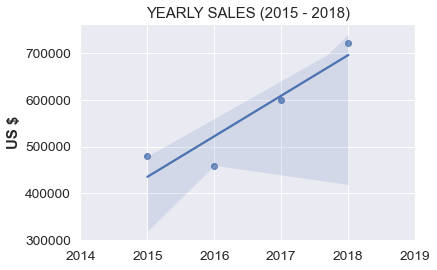

In [38]:
#Plotting sales (2015-2018)
sns.regplot(x='Order Year', y='Sales', data=by_year_TEST)
plt.xticks(by_year_TEST['Order Year'])
plt.title('YEARLY SALES (2015 - 2018)')
plt.ylabel('US $', fontweight='bold')
plt.xlabel('')
plt.xticks(list(range(2014,2020,1)))
plt.savefig('cap2_15thru18_LINREG', dpi=150)
plt.show()

Test Linear Model's accuracy 

RESULTS - This model showed an excellent r-square and a questionable p-value 

In [39]:
#Creating variables for 2019 prediction 
xvals = [0,1,2,3]
yvals = by_year_TEST['Sales']

#Getting stats for 2019 
slope, intercept, r_value, p_value, std_err = stats.linregress(xvals, yvals)
print("Slope: " + str(round(slope,2)) + "\nIntercept: " + str(round(intercept,2)) + "\nR-Squared: " + str(round(r_value,2)) + "\nP-Value: " + str(round(p_value,2)) + "\nStd_Err: " + str(round(std_err,2)))

Slope: 86734.37
Intercept: 435282.58
R-Squared: 0.92
P-Value: 0.08
Std_Err: 25849.97


Use linear regression to predict 2019 sales

In [40]:
# Using line equation to get 2019 predicted sales number 
xval_2019 = slope * 4 + intercept
xval_2019

782220.0549999982

In [41]:
# Creating list from DF and appending it with 2019 predicted value 
xval_no_19 = by_year_TEST['Sales'].tolist()
xval_no_19.append(xval_2019)

In [42]:
#Creating rounded list of Sales Values with $ FOR REF 
sales_all_five = [ round(x, 2) for x in xval_no_19 ]
five_s = sales_all_five.copy()
for_leg = [ "$" + str(x) for x in five_s]

Plotting with 2019 predicted sales-value

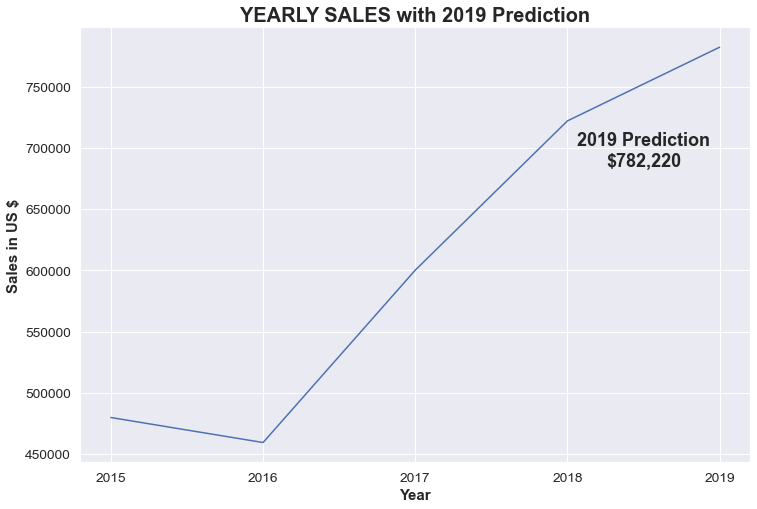

In [43]:
#Plotting 
for_reg_years = [2015,2016,2017,2018,2019]

plt.figure(figsize=(12,8))
plt.plot(for_reg_years,xval_no_19, label='2015 - $479,856\n2016 - $459,435\n2017 - $600,192\n2018 - $722,051\n2019 - $782,220')
plt.xticks(for_reg_years)
plt.title('YEARLY SALES with 2019 Prediction', fontweight='bold', fontsize='20')
plt.xlabel('Year', fontweight='bold', fontsize='15')
plt.ylabel('Sales in US $', fontweight='bold', fontsize='15')
plt.text(2018.5,685000, "2019 Prediction\n$782,220", ha ='center', fontweight='heavy', fontsize='18')
plt.savefig('cap2_2019_PRED.png', transparent=True)
#plt.legend()
plt.show()

# INSIGHTS 

## Further analysis into these insight-points is recommended, as it can lead to valubale information for the new marketing strategy<br>

### 1) New York is a very valuable market for Super-Store<br>
### 2) More item are sold in West-Region, while East-Region has higher overall sales<br>
### 3) In 3 out of 4 years, there is a decrease in sales from March to April
### 3a) During 2 of those years, the decrease is very significant<br>
### 4) All 4 years show a sharp increase in sales from October to November (Nov - month with highest overall sales)<br>
### 5) From 2015 to 2018, all months have an overall increase in sales, except for December, which decreases by ~ 5,000<br>
### 6) In 2018, sales sustained an upward trend for the duration of Q4. This was the only year out of the four where this was the case
